In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='Radio'>

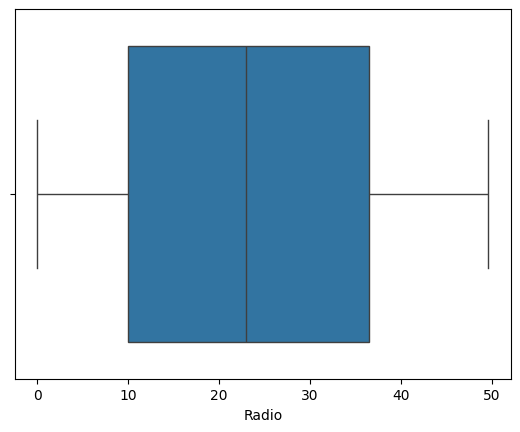

In [7]:
sns.boxplot(x=df['Radio'])

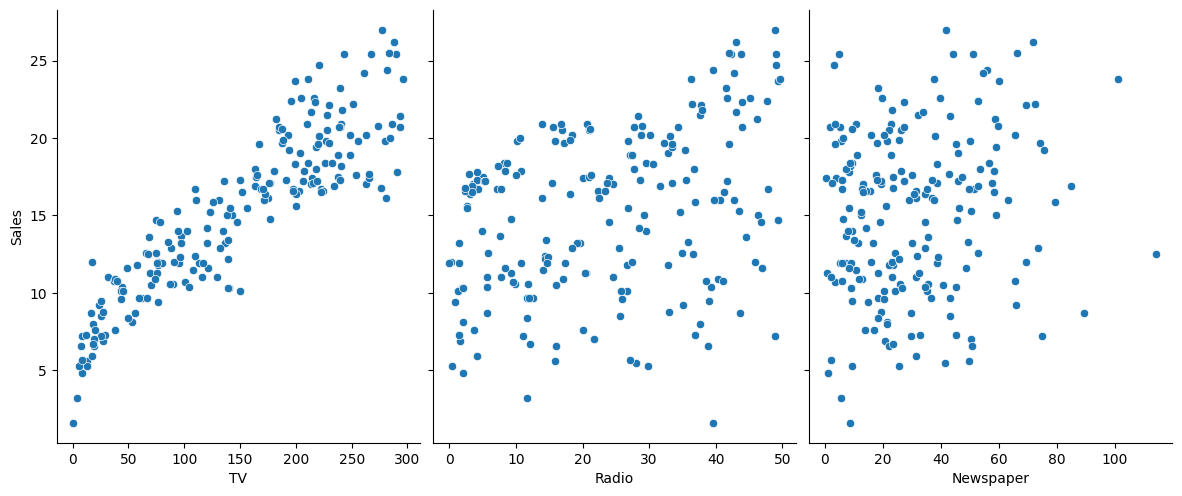

In [10]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'],height=5,aspect=0.8)
plt.show()

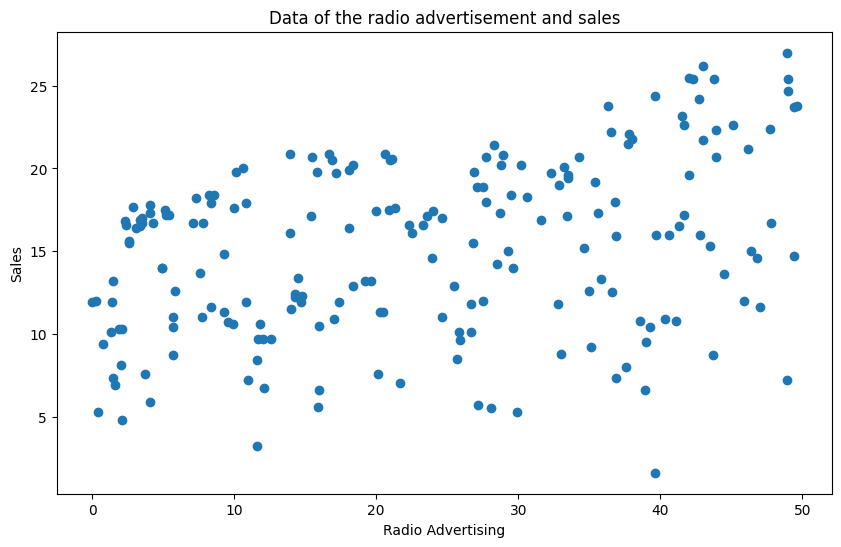

In [12]:
#visualizing the data of the radio advertisement and sales 
plt.figure(figsize=(10,6))
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Data of the radio advertisement and sales')
plt.show()

In [15]:
#now the independent and dependent feature will be stored
X = df[['Radio']]
y = df['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [20]:
coefficient = model.coef_
intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_test-y_pred)**2).sum()

# Display coefficients and intercept
print(f"Coefficients: {coefficient}")
print(f"Intercept: {intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")

Coefficients: [0.12000114]
Intercept: 12.585523978355143
Mean Squared Error: 27.595581948583174
Mean Absolute Error: 4.596574324841752
Residual Sum of Squares: 1103.823277943327
R-Squared Score: 0.10697088619553419


In [24]:
model.score(X_test,y_test)

0.10697088619553419

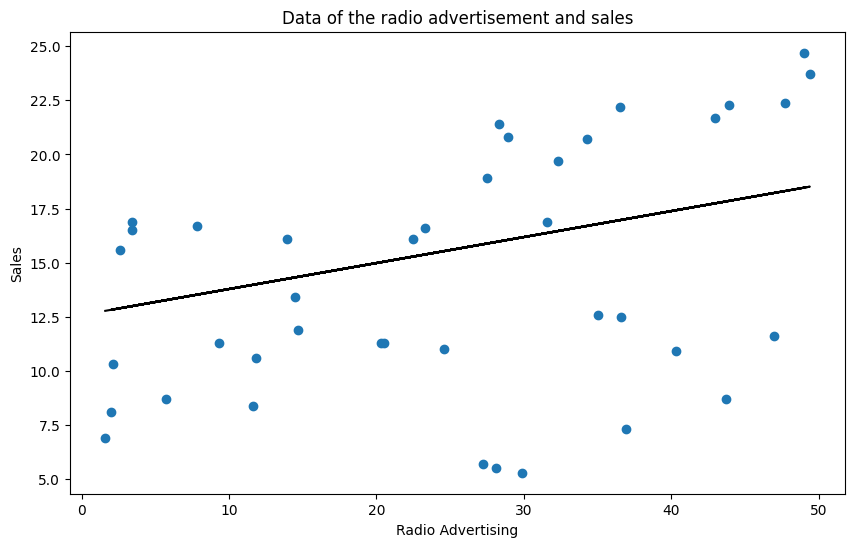

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test)
plt.plot(X_test.values,y_pred, color="black")
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Data of the radio advertisement and sales')
plt.show()